In [2]:
#Lybraries
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [3]:
#settings for plots

#tableau for plots
plt.style.use('tableau-colorblind10')

plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 16        # Default font size for text
plt.rcParams['axes.titlesize'] = 16   # Font size for axes titles
plt.rcParams['axes.labelsize'] = 16   # Font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # Font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for y tick labels

In [4]:
#folders and files
folder = 'placeholder/'
files = os.listdir(folder+'simulations/')

In [5]:
#hyperparameters
N = 400
N_steps = 61000
N_cut = 1000
dt = 0.05 
tau_m = 3 #ms
time = np.arange(0,N_steps*dt,dt)*tau_m
n_bins = 20

mu = 0.6
sigma = 0.6

In [22]:
files

['sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.2_n6_index29.npz',
 'sim_s_dist_homogeneous_muNone_sigmaNone_mean2.2_g0.2_n5_index26.npz',
 'sim_s_dist_homogeneous_muNone_sigmaNone_mean2.2_g0.4_n0_index32.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.2_n5_index27.npz',
 'sim_s_dist_homogeneous_muNone_sigmaNone_mean2.2_g0.2_n6_index28.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.2_n7_index31.npz',
 'sim_s_dist_homogeneous_muNone_sigmaNone_mean2.2_g0.2_n7_index30.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.0_n1_index3.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.4_n0_index33.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.2_n4_index25.npz',
 'sim_s_dist_homogeneous_muNone_sigmaNone_mean2.2_g0.2_n0_index16.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.0_n5_index11.npz',
 'sim_s_dist_homogeneous_muNone_sigmaNone_mean2.2_g0.0_n0_index0.npz',
 'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g0.0_n0_

In [17]:
#selcting simulations to whatc
n = np.random.randint(0,len(files))
file = files[n]
file

'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g2.8_n0_index225.npz'

In [38]:
file =  'sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g2.0_n1_index163.npz'

In [39]:
#loading data
data = np.load(folder+'simulations/'+file)
sim = data['sim']
J = data['J']
S = data['S']
tau = data['tau']

sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g2.4_n3_index199


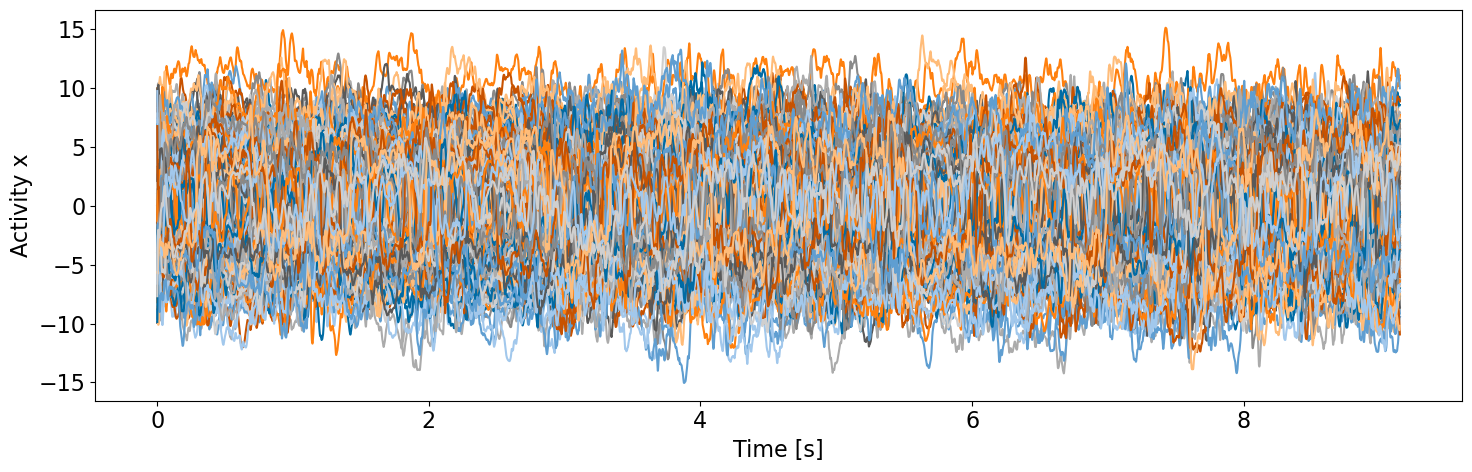

In [18]:
#Plot of the simulation
plt.figure(figsize=(15,5))
plt.plot(time*10**(-3), sim.T)
#plt.title(file.split('.npz')[0])
print(file.split('.npz')[0])
plt.xlabel('Time [s]')
plt.ylabel('Activity x')
plt.show()

sim_s_dist_heterogeneous_mu0.6_sigma0.6_meanNone_g2.0_n1_index163


/tmp/ipykernel_20662/1104733643.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('final_results/ex_scatter_plot_het_s_g2.png', pad_inches=0.1, bbox_inches='tight')
/home/zenn/anaconda3/envs/VCS/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


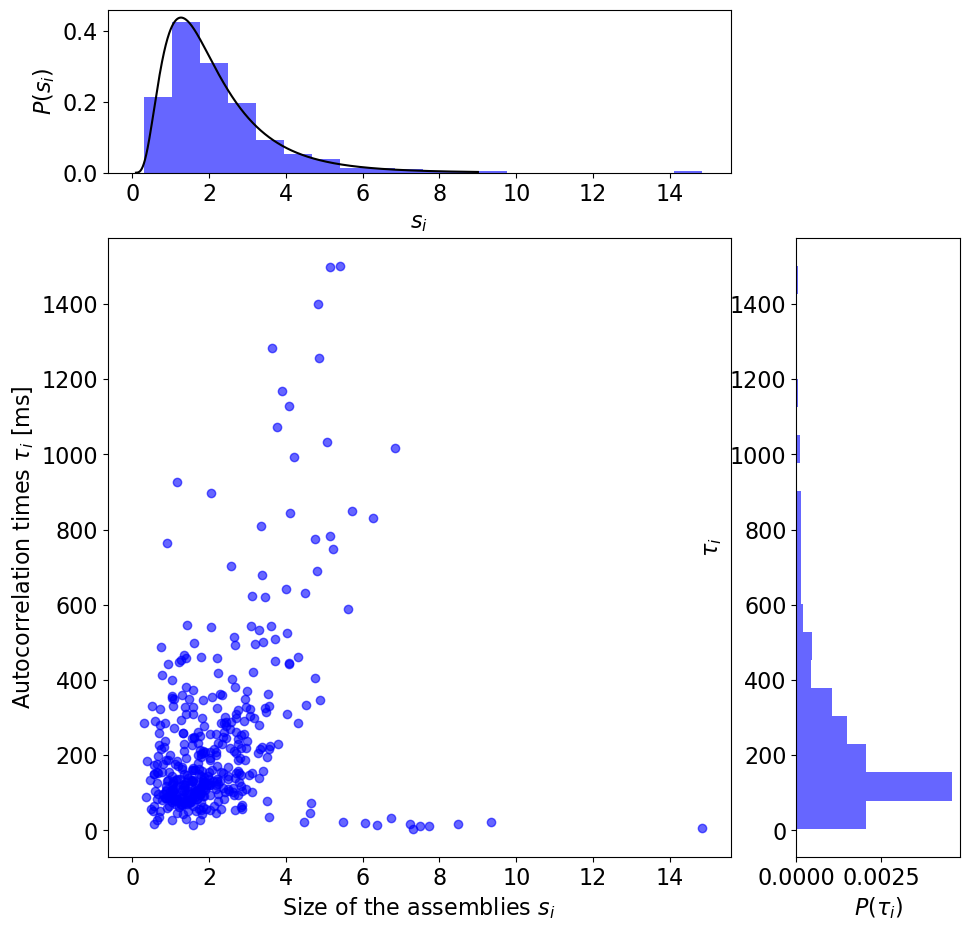

In [43]:
#Plot distributions and scatter plot
# Set up the figure and the grid
fig = plt.figure(figsize=(11, 11))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)

# Define the axes
scatter_ax = fig.add_subplot(grid[1:4, 0:3])
x_hist_ax = fig.add_subplot(grid[0, 0:3], sharex=scatter_ax)
y_hist_ax = fig.add_subplot(grid[1:4, 3], sharey=scatter_ax)

# Scatter plot
scatter_ax.scatter(S, tau*tau_m, color='blue', alpha=0.6)
scatter_ax.set_xlabel(r'Size of the assemblies $s_i$')
scatter_ax.set_ylabel(r'Autocorrelation times $\tau_i$ [ms]')

# X histogram
x_hist_ax.hist(S, bins = n_bins, color='blue', alpha = 0.6, density = True)
x = np.linspace(0.1, 9, 1000)
x_hist_ax.plot(x, np.exp(-0.5*(np.log(x)-mu)**2/sigma**2)/np.sqrt(2*np.pi*sigma**2)/x, color = 'k')
x_hist_ax.set_xlabel(r'$s_i$')
x_hist_ax.set_ylabel(r'$P(s_i)$')


# Y histogram
y_hist_ax.hist(tau*tau_m, bins = n_bins, orientation='horizontal', color='blue', alpha = 0.6, density= True)
y_hist_ax.set_xlabel(r'$P(\tau_i$)')
y_hist_ax.set_ylabel(r'$\tau_i$')

#fig.suptitle(file.split('.npz')[0])
print(file.split('.npz')[0])

plt.savefig('final_results/ex_scatter_plot_het_s_g2.png', pad_inches=0.1, bbox_inches='tight')